# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\AI ML\HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

# Exploring the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Employees left
left = df[df.left==1]
left.shape

(3571, 10)

In [8]:
# Employees stayed
retained = df[df.left==0]
retained.shape

(11428, 10)

In [9]:
df.left.astype(float)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14994    1.0
14995    1.0
14996    1.0
14997    1.0
14998    1.0
Name: left, Length: 14999, dtype: float64

# Data Visualization

<Axes: xlabel='Department'>

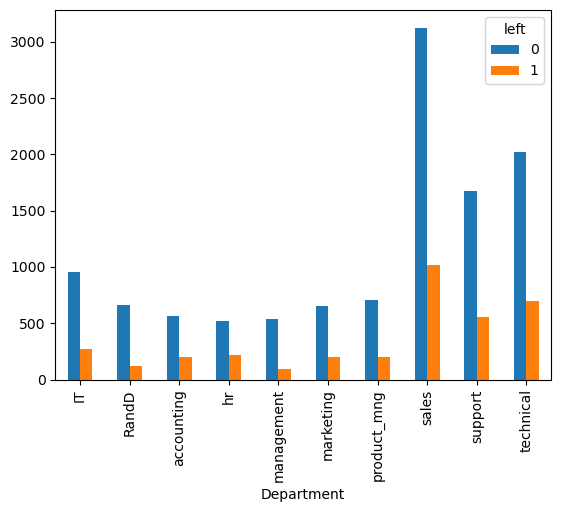

In [10]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

Text(0.5, 1.0, 'Salaries Distribution of employees who left or stayed')

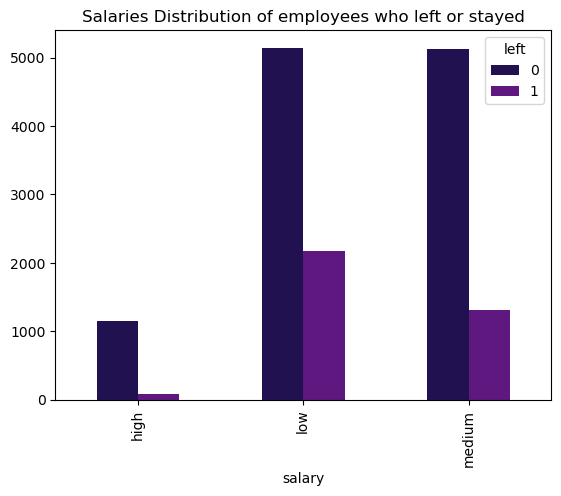

In [11]:
color = sns.color_palette("magma")
pd.crosstab(df.salary,df.left).plot(kind='bar', color = color)
plt.title("Salaries Distribution of employees who left or stayed")

Text(0.5, 1.0, 'Average monthly hours distribution')

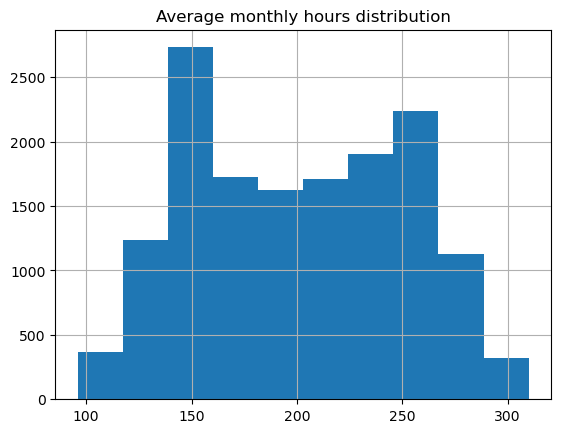

In [12]:
df['average_montly_hours'].hist(bins=10)
plt.title("Average monthly hours distribution")

Text(0.5, 1.0, 'Time spent by the employees in the company')

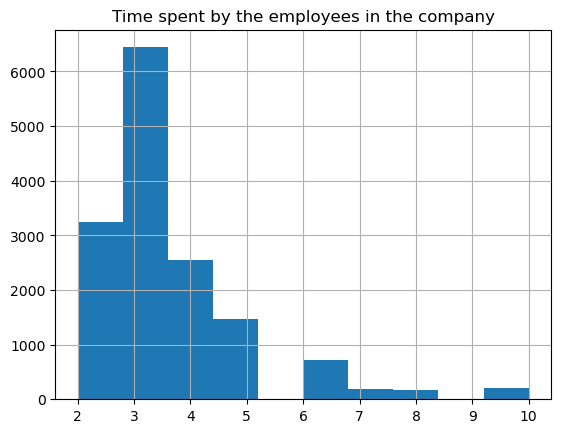

In [13]:
df['time_spend_company'].hist(bins=10)
plt.title("Time spent by the employees in the company")

Text(0.5, 1.0, 'Satisfaction level distribution')

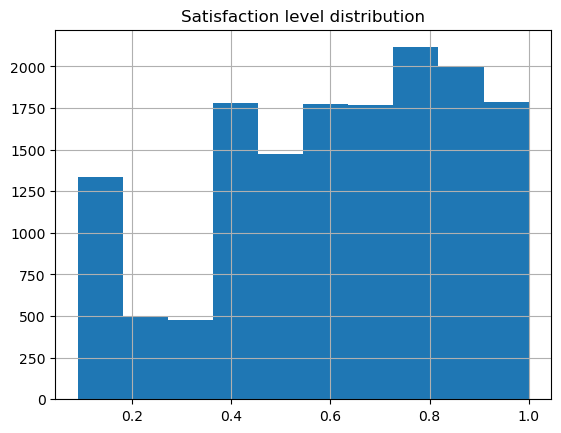

In [14]:
df['satisfaction_level'].hist(bins=10)
plt.title("Satisfaction level distribution")

# Data Preprocessing

In [15]:
sub_df = df[['satisfaction_level','average_montly_hours','time_spend_company',
             'promotion_last_5years','salary']]
sub_df.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157,3,0,low
1,0.80,262,6,0,medium
2,0.11,272,4,0,medium
3,0.72,223,5,0,low
4,0.37,159,3,0,low


In [16]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [17]:
enc_df = pd.DataFrame(enc.fit_transform(sub_df[['salary']]).toarray(), columns = ['high','low','medium'])
subdf = sub_df.join(enc_df) 

In [18]:
subdf.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary,high,low,medium
0,0.38,157,3,0,low,0.0,1.0,0.0
1,0.80,262,6,0,medium,0.0,0.0,1.0
2,0.11,272,4,0,medium,0.0,0.0,1.0
3,0.72,223,5,0,low,0.0,1.0,0.0
4,0.37,159,3,0,low,0.0,1.0,0.0


In [19]:
subdf = subdf.drop('salary', axis = 1)

In [20]:
x = subdf
x.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,high,low,medium
0,0.38,157,3,0,0.0,1.0,0.0
1,0.80,262,6,0,0.0,0.0,1.0
2,0.11,272,4,0,0.0,0.0,1.0
3,0.72,223,5,0,0.0,1.0,0.0
4,0.37,159,3,0,0.0,1.0,0.0


In [21]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

# Splitting the Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.2)

In [24]:
x_train.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,high,low,medium
4243,0.74,147,5,0,0.0,0.0,1.0
11807,0.65,180,2,0,0.0,1.0,0.0
597,0.11,263,4,0,0.0,1.0,0.0
6220,0.69,207,3,0,0.0,0.0,1.0
5258,0.66,262,2,0,0.0,1.0,0.0


In [25]:
y_train.head()

4243     0
11807    0
597      1
6220     0
5258     0
Name: left, dtype: int64

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(x_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
x_test

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,high,low,medium
3234,0.84,140,2,0,1.0,0.0,0.0
1479,0.39,142,3,0,0.0,0.0,1.0
6317,0.42,209,2,0,0.0,1.0,0.0
9866,0.12,287,6,0,0.0,0.0,1.0
9917,0.63,252,2,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
4550,0.65,233,3,1,0.0,0.0,1.0
11403,0.48,220,3,1,0.0,0.0,1.0
11518,0.63,233,3,0,0.0,0.0,1.0
9405,0.51,142,4,0,0.0,1.0,0.0


In [31]:
model.score(x_test,y_test)

0.7720833333333333

- predict() gives you a single answer for each input instance, while predict_proba() gives you a set of probabilities for each input instance.
- For example: predict() method predicted that the first input instance is class 0 and the second input instance is class 1. 
  The predict_proba() method predicted that the first input instance has a 99% probability of being class 0 and a 1% probability of being class 1. The second input instance has a 99% probability of being class 1 and a 1% probability of being class 0.

In [32]:
model.predict_proba(x_test)

array([[0.98738887, 0.01261113],
       [0.75187086, 0.24812914],
       [0.64593457, 0.35406543],
       ...,
       [0.87371926, 0.12628074],
       [0.65333043, 0.34666957],
       [0.49388306, 0.50611694]])

In [33]:
y_pred = model.predict(x_test)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [35]:
from sklearn.metrics import classification_report

**Classification report** summarizes the model's performance. The proportion of genuine positives among all positive forecasts, or how precise the predictions are is known as **precision**, whereas the proportion of real positives among all actual positive cases is known as **recall**. <br> 
**F1 score** is a measurement that considers both precision and recall to compute the score. It can be interpreted as a weighted average of the precision and recall values and cannot be high without both precision and recall also being high. When a model’s F1 score is high, the model is doing well. **Categorization report** also includes accuracy, which is the percentage of true predictions made by the model out of all predictions generated by the model. We use it to measure the total number of predictions a model gets right, including both True Positives and True Negatives.

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     10646
           1       0.26      0.56      0.36      1354

    accuracy                           0.77     12000
   macro avg       0.60      0.68      0.61     12000
weighted avg       0.86      0.77      0.80     12000

